## Project-Step 1

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

###  1. Descriptive analysis of your data.

In [51]:
df = pd.read_csv("winequality-red_missing_outliers.csv", sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1537 non-null   float64
 1   volatile acidity      1548 non-null   float64
 2   citric acid           1553 non-null   float64
 3   residual sugar        1546 non-null   float64
 4   chlorides             1544 non-null   float64
 5   free sulfur dioxide   1551 non-null   float64
 6   total sulfur dioxide  1557 non-null   float64
 7   density               1565 non-null   float64
 8   pH                    1567 non-null   float64
 9   sulphates             1564 non-null   float64
 10  alcohol               1574 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
print("Taille :", df.shape)

Taille : (1599, 12)


In [54]:
print("\nRésumé statistique :")
df.describe()



Résumé statistique :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1537.000000,1548.000000,1553.000000,1546.000000,1544.000000,1551.000000,1557.000000,1565.000000,1567.000000,1564.000000,1574.000000,1599.000000
mean,8.330737,0.520956,0.269790,2.535268,0.087321,15.711019,47.453391,0.996706,3.308319,0.658379,10.425626,5.636023
std,2.175360,0.224747,0.259229,1.878410,0.056260,13.433933,38.935992,0.002548,0.201759,0.208752,1.429223,0.807569
min,-8.978645,-1.261669,-1.682195,-11.569358,-0.389640,-89.086406,-277.295003,0.977872,1.761453,-1.041319,-0.210531,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,22.000000,63.000000,0.997870,3.400000,0.730000,11.100000,6.000000
max,25.611566,2.319007,2.221204,16.631777,0.611000,120.827218,370.037457,1.015640,4.861406,2.357418,21.056846,8.000000


In [55]:
df.isna().sum()

fixed acidity           62
volatile acidity        51
citric acid             46
residual sugar          53
chlorides               55
free sulfur dioxide     48
total sulfur dioxide    42
density                 34
pH                      32
sulphates               35
alcohol                 25
quality                  0
dtype: int64

In [56]:
(df.isna().mean() * 100).sort_values(ascending=False)

fixed acidity           3.877423
chlorides               3.439650
residual sugar          3.314572
volatile acidity        3.189493
free sulfur dioxide     3.001876
citric acid             2.876798
total sulfur dioxide    2.626642
sulphates               2.188868
density                 2.126329
pH                      2.001251
alcohol                 1.563477
quality                 0.000000
dtype: float64

In [57]:
df["quality"].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

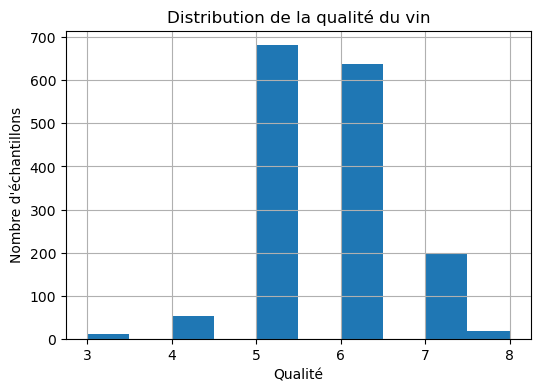

In [58]:
plt.figure(figsize=(6,4))
df["quality"].hist(bins=10)
plt.xlabel("Qualité")
plt.ylabel("Nombre d'échantillons")
plt.title("Distribution de la qualité du vin")
plt.show()


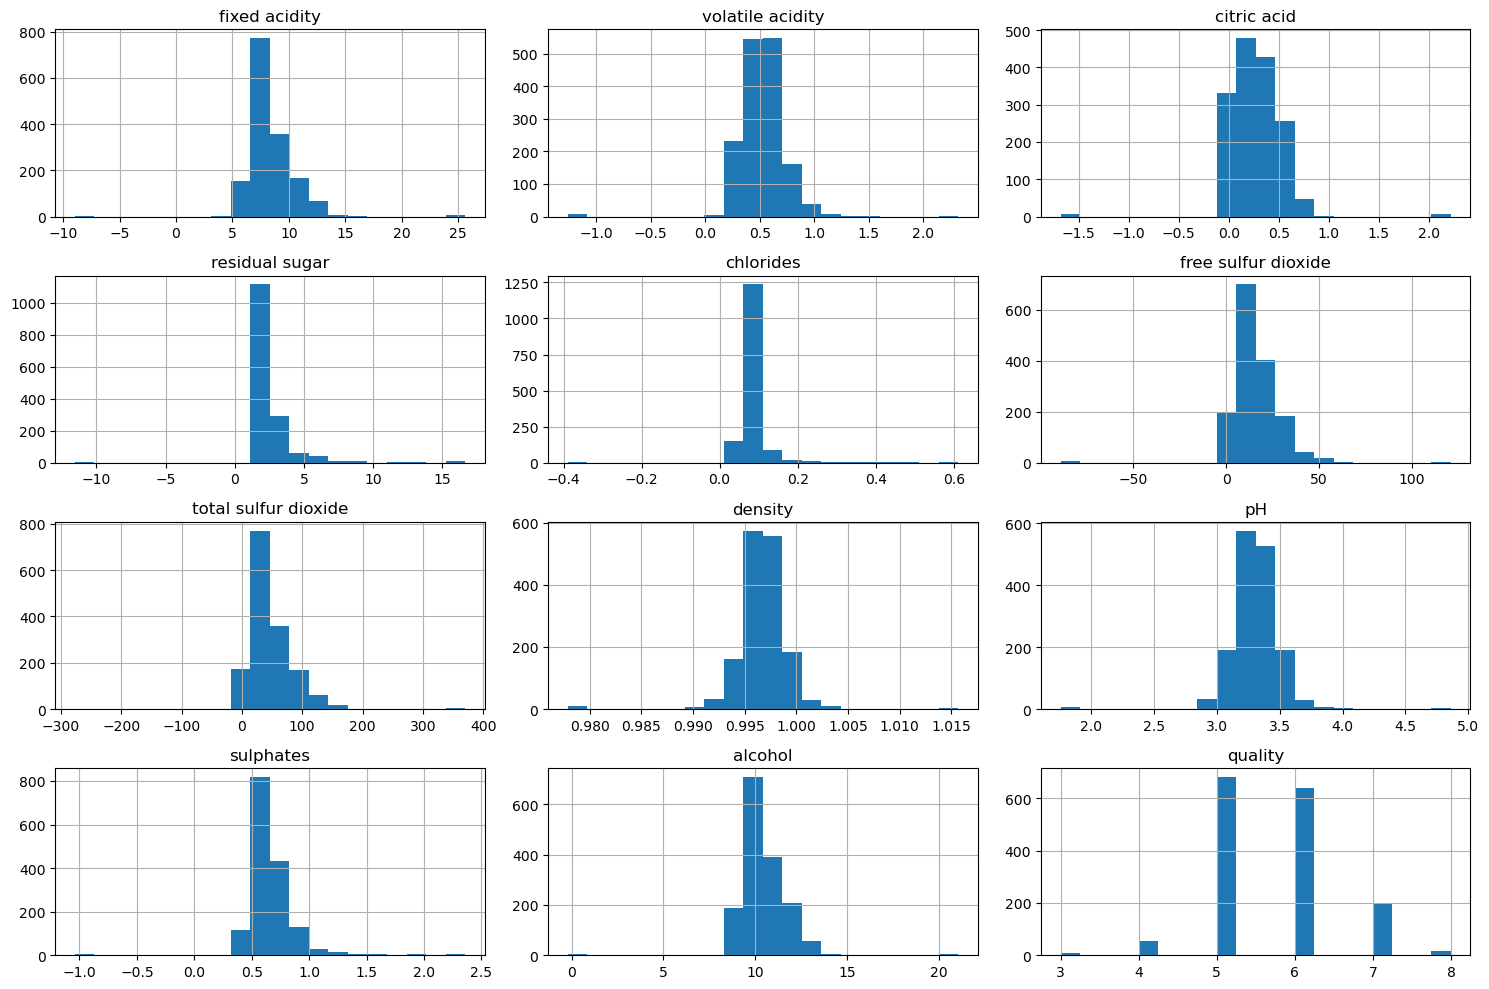

In [59]:
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

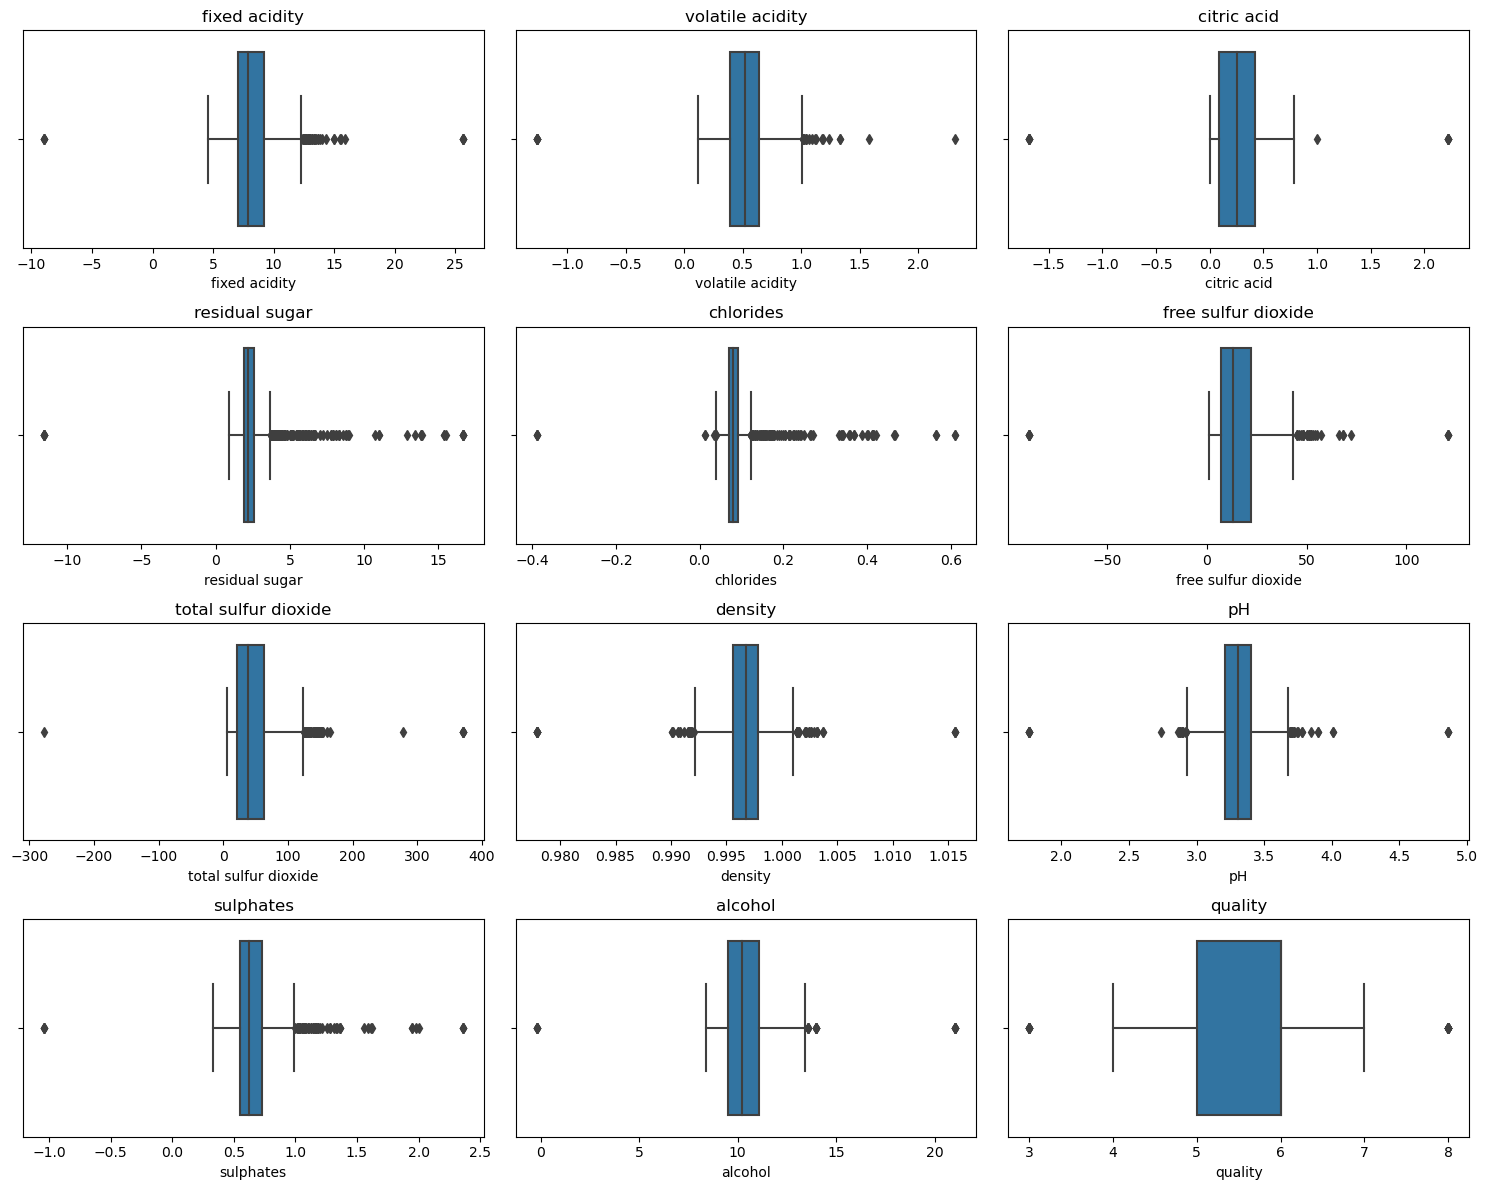

In [60]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


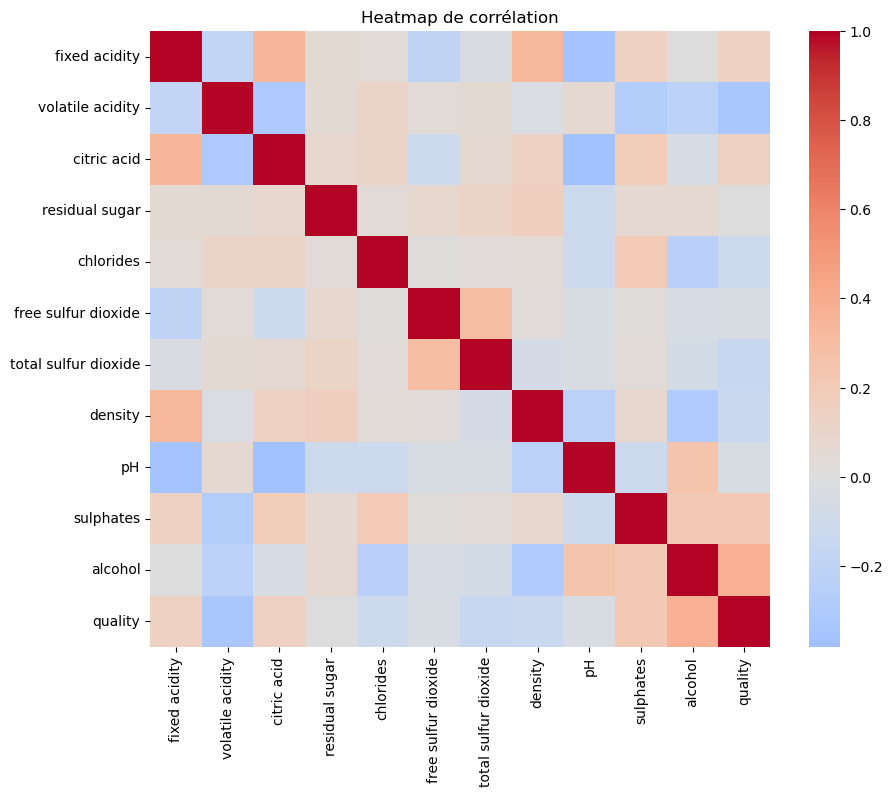

In [61]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Heatmap de corrélation")
plt.show()


In [62]:
corr["quality"].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.377948
sulphates               0.214716
citric acid             0.157469
fixed acidity           0.134349
residual sugar          0.005087
pH                     -0.036649
free sulfur dioxide    -0.043802
chlorides              -0.115480
density                -0.133439
total sulfur dioxide   -0.146266
volatile acidity       -0.338852
Name: quality, dtype: float64

## 2; Data preprocessing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [64]:
X = df.drop("quality", axis=1)
y = df["quality"]

X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [65]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

Les colonnes présentent entre 1,5 % et 4 % de valeurs manquantes.
Étant donné que toutes les variables sont numériques et souvent asymétriques, la médiane est plus robuste que la moyenne car elle n’est pas influencée par les valeurs extrêmes.
C’est donc la stratégie la plus adaptée.

In [66]:
X_winsorized = X_imputed.copy()

for i in range(X_winsorized.shape[1]):
    low = np.percentile(X_winsorized[:, i], 1)
    high = np.percentile(X_winsorized[:, i], 99)
    X_winsorized[:, i] = np.clip(X_winsorized[:, i], low, high)

Certaines variables montrent des valeurs extrêmes, notamment :
- alcohol
- volatile acidity
- sulphates

Ces outliers peuvent détériorer les performances des modèles linéaires et perturber la standardisation.
La winsorisation à 1 %–99 % permet de réduire l’effet des valeurs aberrantes tout en conservant l’information.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_winsorized, y, test_size=0.3, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

La standardisation (z-score) est essentielle car :
- les variables n’ont pas la même échelle (ex : density ≈ 1, sulphates ≈ 0.5)
- les modèles utilisés (régression linéaire, régression régularisée plus tard, PCA éventuelle) sont sensibles aux différences d’échelle
- un scale homogène facilite l’optimisation du modèle

In [69]:
preprocessing_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("winsorize", None),  # On fera un custom transformer si demandé
    ("scaler", StandardScaler())
])

## 3. FORMALISATION

The goal of this project is to predict the quality of wine based on its physicochemical properties.

Each wine sample is described by a set of continuous variables : fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality.

Our target variable is quality, it corresponds to a score (between 0 and 10) given by wine tasters.

The model should be able to estimate this quality score using the provided features.

### **Input and Output Variables**

**Input :**
- fixed acidity  
- volatile acidity  
- citric acid  
- residual sugar  
- chlorides  
- free sulfur dioxide  
- total sulfur dioxide  
- density  
- pH  
- sulphates  
- alcohol

**Output :**
- quality

### **Type of Problem**

Here, we have to main way to treat this Problem:

- We could do a regression, trying to predict the exact score of quality (i.e. 7,2)

        --> Linear Regression, Random Forest Regression, ...

- Or we could go for a classification with for exemple very low, low, medium, high quality and try predicting the class

        --> k-NN, Decision Tree, ...

### **Evaluation Metrics**

For a **Regression** problem, we can use :
- MAE = average absolute difference between predicted and true values

- MSE or RMSE = penalizes larger errors

- coefficient of determination R² – measures how well the model explains the variability in quality

For a **classification** problem, the metrics we could use are :
- Accracy
- Precision, Recall
- Confusion Matrix

## **4. Selection of a baseline model and implementation of the model**

### **Choice of a Model**

The dataset contains missing values between 1.5% and 4% depending on the variables, which is low. Median imputation is sufficient.  
Several variables have outliers, notably alcohol, sulfates, and volatile acidity, which require treatment (winsorization).


The target variable quality is highly **unbalanced**, with a majority of wines rated 5 or 6, which makes classification difficult. The problem will therefore be treated as a **regression**, which is more appropriate.


The correlations between the variables and quality are weak, which is typical of the dataset. The most informative variables are **alcohol** (0.38) and **volatile acidity** (-0.34).  
Some variables, such as residual sugar, pH, and free sulfur dioxide, contribute little to the prediction but will be retained for the time being.

Ce modèle prédit systématiquement la moyenne de la variable qualité.
Il permet d’établir une référence extrêmement simple :
si un autre modèle ne fait pas mieux, il est inutile ou mal entraîné.

In [70]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train)

y_pred_dummy = dummy.predict(X_test_scaled)

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_dummy = r2_score(y_test, y_pred_dummy)

mae_dummy, rmse_dummy, r2_dummy


(0.6779434763181411, 0.7976280488299045, -0.0034495046252929207)

La régression linéaire est un très bon premier modèle pour ce dataset car :

- toutes les variables sont numériques, ce qui facilite la modélisation

- les relations sont faiblement corrélées mais restent majoritairement monotones

- c’est un modèle interprétable et rapide

- il constitue un bon point de comparaison avant d’introduire des modèles non linéaires (Random Forest, Gradient Boosting…)

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


(0.5216960270258305, 0.6500321536456399, 0.3335549196110138)

In [72]:
results = pd.DataFrame({
    "MAE": [mae_dummy, mae_lr],
    "RMSE": [rmse_dummy, rmse_lr],
    "R2": [r2_dummy, r2_lr]
}, index=["Dummy Regressor", "Linear Regression"])

results

,MAE,RMSE,R2
Dummy Regressor,0.677943,0.797628,-0.003450
Linear Regression,0.521696,0.650032,0.333555


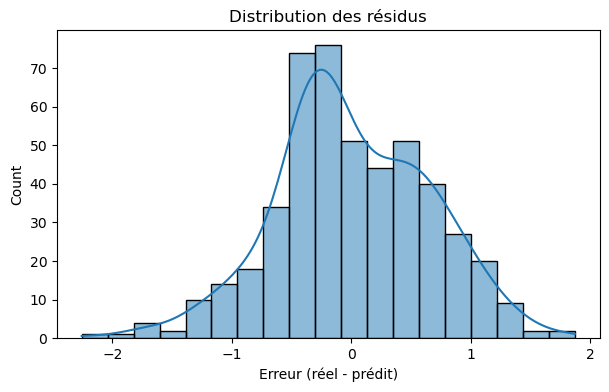

In [73]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Erreur (réel - prédit)")
plt.show()

## Conclusion Step 1

L’analyse descriptive a montré que la variable quality est très concentrée autour des notes 5 et 6, et que les corrélations avec les variables physico-chimiques sont faibles (seuls alcohol et volatile acidity dépassent |0.3|). Cela indique que la qualité du vin dépend en grande partie de facteurs absents du dataset, ce qui rend la prédiction difficile.

Après imputation, winsorisation et standardisation, un Dummy Regressor a été utilisé comme baseline. Il obtient :

- MAE = 0.678, RMSE = 0.798, R² = –0.003,
ce qui est normal puisqu’il prédit simplement la moyenne.

La régression linéaire améliore nettement les performances :

- MAE = 0.522, RMSE = 0.650, R² = 0.334.

Le R² reste faible, mais ce résultat est totalement cohérent avec ce dataset, dans lequel même les modèles linéaires optimisés dépassent rarement 0.35. Cela confirme que un signal existe dans les données, mais la relation entre les features et la qualité est partiellement non linéaire et très bruitée.

La suite consistera à tester des modèles non linéaires (Random Forest, Gradient Boosting) qui captent mieux la complexité du problème et devraient améliorer les performances par rapport à la régression linéaire.